In [ ]:
!git clone https://github.com/wehrley/Kaggle-Digit-Recognizer

fatal: destination path 'Kaggle-Digit-Recognizer' already exists and is not an empty directory.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import pandas as pd
import os
os.chdir('/content/Kaggle-Digit-Recognizer')

In [ ]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print(train_df.shape,test_df.shape)

(42000, 785) (28000, 784)


In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separate labels and features
X_train = train_df.drop(columns='label').values
y_train = train_df['label'].values
X_test = test_df.values

In [ ]:
# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.8299 - loss: 0.5618 - val_accuracy: 0.9662 - val_loss: 0.1051
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9776 - loss: 0.0707 - val_accuracy: 0.9848 - val_loss: 0.0519
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9842 - loss: 0.0474 - val_accuracy: 0.9840 - val_loss: 0.0557
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 72ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy: 0.9849 - val_loss: 0.0464
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9864 - val_loss: 0.0419
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9871 - val_loss: 0.0434
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9930 - loss: 0.0200 - val_accuracy: 0.9864 - val_loss: 0.0447
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9940 - loss: 0.0183 - 

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9895 - loss: 0.0396
Validation Accuracy: 0.9906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Label for Image 500: 6


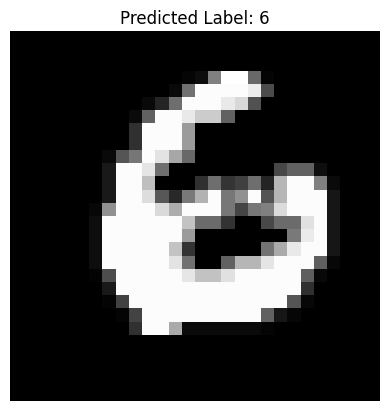

In [ ]:
import matplotlib.pyplot as plt

# Choose an index for a single image
index = 500

# Extract the single image and prepare it for prediction
single_image = X_test[index:index+1]  # Shape: (1, 28, 28, 1)

# Make prediction
prediction = model.predict(single_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label for Image {index}: {predicted_label}")

# Visualize the image
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
model.save("/content/drive/My Drive/SM_Digit_Recognizer.h5")